# Практика

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [3]:
# генерируем выборку из экспоненциального распределения

expon_rv = sts.expon()
sample = expon_rv.rvs(100)
sample

array([0.4203991 , 0.54649226, 1.17535579, 0.04768214, 0.64145048,
       0.0140108 , 0.74389989, 1.09194067, 0.99288716, 0.36833181,
       0.1390541 , 1.79117291, 3.33509613, 0.61252635, 0.4857342 ,
       3.14917793, 1.62292298, 0.15857764, 0.383766  , 2.10335172,
       0.20006831, 1.48018603, 0.27926984, 0.21612399, 2.08172229,
       1.61169356, 0.60633979, 1.39318485, 0.8394927 , 0.05915189,
       0.22206358, 2.45252276, 0.83216359, 1.25193493, 0.74213942,
       0.43024106, 0.32240942, 2.91454447, 0.71235282, 0.78165158,
       0.03444373, 0.85822017, 0.09110627, 0.16153692, 3.83913768,
       0.32394172, 0.72462908, 1.98001541, 0.31892546, 0.22226897,
       0.17304637, 0.94984101, 0.0678615 , 0.25777252, 0.10189536,
       1.37370128, 0.60968533, 1.64299882, 0.26904816, 1.32195202,
       1.45024234, 0.29165712, 1.51267373, 0.49382142, 2.07397526,
       0.09587879, 0.45437823, 0.48452194, 1.22440563, 0.08422323,
       3.51260766, 0.65942591, 0.79110731, 1.79926577, 0.08006

In [4]:
sample.dtype

dtype('float64')

In [7]:
real_mean = expon_rv.mean() # настоящее среднее случайной величины
print(real_mean)

1.0


In [8]:
real_var = expon_rv.var() # настоящая дисперсия случайной величины
print(real_var)

1.0


### Постройте гистограмму выборки и теоретическую плотность распределения

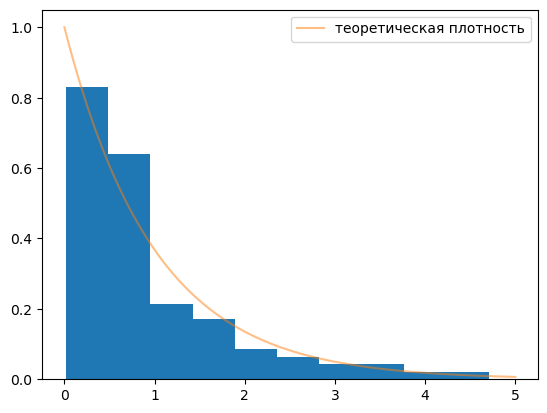

In [14]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(0,5,100)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность',alpha=0.5 )
plt.legend()

In [7]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-0.07441302151317408
1.1302528840397728


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

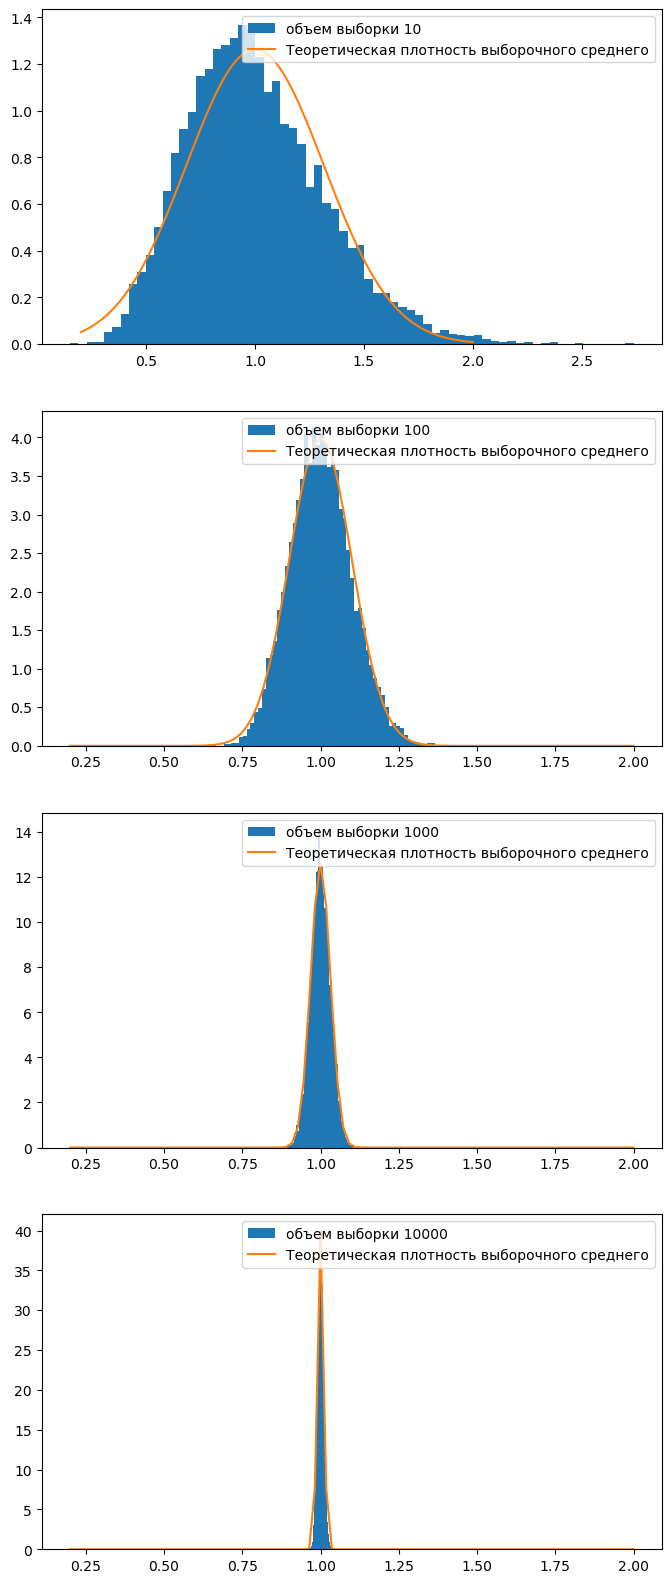

In [55]:
num=1
plt.figure(figsize=(8, 20))
for N in [10, 100, 1000, 10000]:
    # сгенерируем много выборочных средних
    means = []
    for i in range(10000):
        means.append(np.mean(expon_rv.rvs(N)))
    plt.subplot(4, 1, num)
    plt.hist(means, density=True, bins='auto',label='объем выборки '+str(N))
    norm_rv = sts.norm(loc=real_mean, scale=real_var / np.sqrt(N))
    x = np.linspace(0.2,2,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='Теоретическая плотность выборочного среднего' )
    plt.legend()
    plt.plot()
    num+=1
  

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Для экспоненциального распределения апроксимация распределения выборочного среднего нормальным распределением работает хорошо. С увеличением объема выборки точность аппроксимации увеличивается.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [58]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [111]:
from statsmodels.stats.weightstats import _zconfint_generic
# получаем выборку ушедших
dfchurn=df[df['churn']]
# получаем столбец total day calls
calls_churn=dfchurn['total day calls']
# получаем выборку не ушедших
dfnot_churn=df[ df['churn']==False]
# получаем столбец total day calls
calls_not_churn=dfnot_churn['total day calls']

N1=len(dfchurn)
print('число ушедших ',N1)
m1=calls_churn.mean()
print('среднее число дневных звонков для ушедших ',m1)
std1=calls_churn.std(ddof=1)
print('стандартное отклонение  числа дневных звонков для ушедших ',std1)
# доверительная вероятность
prob=0.95
# квантиль N(0;1)
u=sts.norm.ppf((1+prob)/2, loc=0, scale=1)
print(prob*100,'%-й доверительный интервал для среднего значения числа дневных звонков для ушедших по формуле') 
print('(',m1-u*std1/math.sqrt(N1),';',m1+u*std1/math.sqrt(N1),')')
print(prob*100,'%-й доверительный интервал для среднего значения числа дневных звонков для ушедших с помощью функции') 
print(zconfint(calls_churn, alpha=0.05, alternative="two-sided"))

print()
N2=len(dfnot_churn)
print('число не ушедших ',N2)
m2=calls_not_churn.mean()
print('среднее число дневных звонков для не ушедших ',m2)
std2=calls_not_churn.std(ddof=1)
print('стандартное отклонение  числа дневных звонков для не ушедших ',std2)
print(prob*100,'%-й доверительный интервал для среднего значения числа дневных звонков для не ушедших по формуле') 
print('(',m2-u*std2/math.sqrt(N2),';',m2+u*std2/math.sqrt(N2),')')
print(prob*100,'%-й доверительный интервал для среднего значения числа дневных звонков для не ушедших с помощью функции') 
print(zconfint(calls_not_churn, alpha=0.05, alternative="two-sided"))




число ушедших  483
среднее число дневных звонков для ушедших  101.33540372670808
стандартное отклонение  числа дневных звонков для ушедших  21.58230721307551
95.0 %-й доверительный интервал для среднего значения числа дневных звонков для ушедших по формуле
( 99.41066229112079 ; 103.26014516229537 )
95.0 %-й доверительный интервал для среднего значения числа дневных звонков для ушедших с помощью функции
(99.41066229112079, 103.26014516229537)

число не ушедших  2850
среднее число дневных звонков для не ушедших  100.28315789473685
стандартное отклонение  числа дневных звонков для не ушедших  19.801156951805503
95.0 %-й доверительный интервал для среднего значения числа дневных звонков для не ушедших по формуле
( 99.55618833318324 ; 101.01012745629045 )
95.0 %-й доверительный интервал для среднего значения числа дневных звонков для не ушедших с помощью функции
(99.55618833318324, 101.01012745629045)


Результаты расчета с помощью формулы и с помощью функции zconfint совпали.
